# 数値解析 第2回 レポート

<div style="text-align: right;"><font size="4">
学籍番号: ■■■■■■■■<br>
氏名: 佐藤 瞭<br>
学科: 計数工学科(数理情報工学コース)<br>
<br>
連絡先: ■■■■■■■■■■<br>
2019/01/21 提出
</font></div><br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
init_y = np.array([[1.], [0.]])
matrix = np.array([[0., -1.], [1., 0.]])

## (1)

## 問題設定
真の解を
$$
y(t) = \begin{bmatrix}
    p(t) \\
    q(t) \\
\end{bmatrix}
$$
とすれば，与えられた微分方程式は
$
J = \begin{bmatrix}
    0 & -1 \\
    1 & 0 \\
\end{bmatrix}
$
を用いて，
$$
\frac {\rm d} {{\rm d}t} y(t) = J y(t)
$$
と表せる．

また，刻み幅$h$を用いて近似解を$y_n \simeq y(t_n) ~~~ (t_{n+1} = t_n + h, ~~ n = 0, 1, ...)$とおく．

以下はこの$y_n$，$h$，$J$を用いて各手法の更新式を表す．

なお，真の解軌道は原点を中心とする半径1の円になる．

また，解軌道には矢印をつけて安定/不安定を判定しやすくしてある．

### 陽的Euler法
$$
\frac {y_{n+1} - y_n}{h} = J y_n
$$
より
$$
{\boldsymbol {y_{n+1} = y_n + h J y_n}}
$$

In [3]:
def explicit_euler(init_y, matrix, time_stride, n_iter=100):
    result = np.array([[1], [0]])
    y = init_y.copy()
    for _ in range(n_iter):
        y += time_stride * np.dot(matrix, y)
        result = np.append(result,  y.copy())
    return result.reshape(-1, len(init_y))

In [4]:
def add_arrow(result, start, stop, step):
    for iter_num in range(start, stop, step):
        plt.arrow(
            x=result[iter_num, 0], y=result[iter_num, 1],
            dx=result[iter_num + 1, 0] - result[iter_num, 0],
            dy=result[iter_num + 1, 1] - result[iter_num, 1],
            width=0.01, head_width=0.08,
            head_length=0.2, length_includes_head=True, color='b')

In [5]:
def plot_track(resilt, time_stride, n_iter, start, step, method_name):
    plt.figure(figsize=(5, 5))
    plt.plot(result[:, 0], result[:, 1], color='b', label='解軌道', zorder=1)
    add_arrow(result, start, len(result) - 1, step)
    plt.title(f'''
        {method_name}の解軌道
        (反復: {n_iter}回, 時間刻み幅: {time_stride})''')
    plt.xlabel('p')
    plt.ylabel('q')
    plt.scatter(1, 0, color='r', s=50, label='初期点', zorder=2)
    plt.scatter(
        result[-1, 0], result[-1, 1],
        color='m', s=50, label='最終反復での点', zorder=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

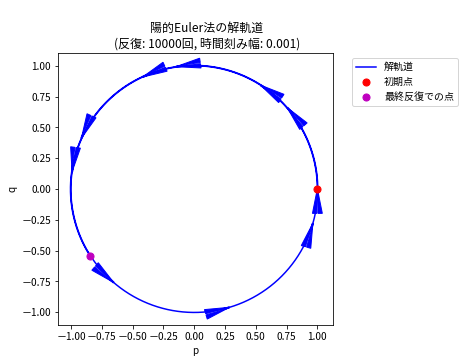

In [6]:
time_stride = 0.001
n_iter = 10000
result = explicit_euler(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '陽的Euler法')

時間刻み幅0.001の場合．解軌道を目視しただけではほぼ安定しているように見える．

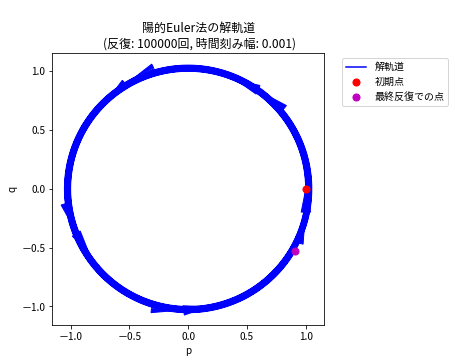

In [7]:
n_iter = 100000
result = explicit_euler(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '陽的Euler法')

時間刻み幅を変えずに反復回数を増やしてみた．軌道の線が重なって安定/不安定が判別しにくいが，「初期点」と「最終反復での点」を見比べると，解軌道は少しずつ広がっており，厳密には安定していないことがわかる．

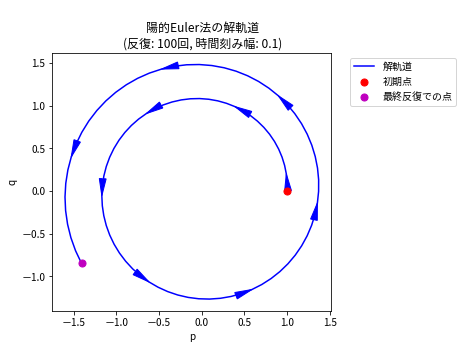

In [8]:
time_stride = 0.1
n_iter = 100
result = explicit_euler(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '陽的Euler法')

時間刻み幅を大きくすると解軌道はより急速に広がるようになり，さらに不安定になった．

### 陰的Euler法
$$
\frac {y_{n+1} - y_n}{h} = J y_{n+1}
$$
より
$$
y_{n+1} = y_n + h J y_{n+1} \\
{\boldsymbol {(E - h J)y_{n+1}  = y_n}}
$$
を各更新で${y_{n+1}}$について解く．

あるいは，$(E - h J)^{-1}$をあらかじめ計算しておき，
$$
{\boldsymbol {y_{n+1}  = (E - h J)^{-1}y_n}}
$$
とする．今回の場合，前者と後者の両方で線形方程式を解く必要がある．前者の場合は毎回の更新で線形方程式を解く必要があるが，後者の場合は1度計算するだけでよいので，ここでは後者の更新方法を採用した．

In [9]:
def implicit_euler(init_y, matrix, time_stride, n_iter=100):
    result = np.array([[1], [0]])
    y = init_y.copy()
    update_matrix = np.eye(len(init_y)) - time_stride * matrix
    update_matrix = np.linalg.solve(
        np.eye(len(init_y)) - time_stride * matrix, np.identity(len(init_y)))
    for _ in range(n_iter):
        y = np.dot(update_matrix, y)
        result = np.append(result,  y.copy())
    return result.reshape(-1, len(init_y))

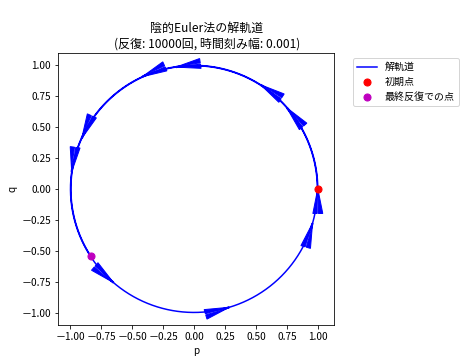

In [10]:
time_stride = 0.001
n_iter = 10000
result = implicit_euler(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '陰的Euler法')

時間刻み幅0.001の場合．目視では安定しているように見える．

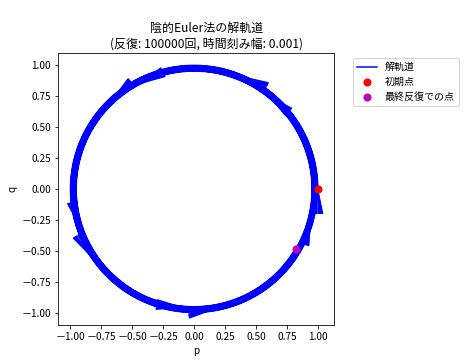

In [11]:
n_iter = 100000
result = implicit_euler(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '陰的Euler法')

時間刻み幅を変えずに更に反復してみる．軌道の線が重なって安定/不安定が判別しにくいが，「初期点」と「最終反復での点」を見比べると，解軌道は少しずつ原点に向かって収束しており，安定していることがわかる．

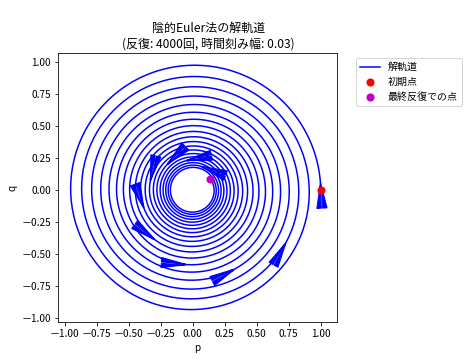

In [12]:
time_stride = 0.03
n_iter = 4000
result = implicit_euler(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '陰的Euler法')

時間刻み幅を大きくすると，より急速に原点に向かって収束する．したがって，この場合も安定している．

### 台形則
$$
\frac {y_{n+1} - y_n}{h} = \frac {J y_{n+1} + Jy_n} {2}
$$
より
$$
2 y_{n+1} - 2  y_n = h J y_{n+1} + h J y_n \\
{\boldsymbol {(2 E - h J)y_{n+1}  = (2 E + h J)y_n}}
$$
を各更新で${y_{n+1}}$について解く．

あるいは，$(2 E - h J)^{-1}$をあらかじめ計算しておき，
$$
{\boldsymbol {y_{n+1}  = (2 E - h J)^{-1}(2 E + h J)y_n}}
$$
とする．今回の場合，前者と後者の両方で線形方程式を解く必要がある．前者の場合は毎回の更新で線形方程式を解く必要があるが，後者の場合は1度計算するだけでよいので，ここでは後者の更新方法を採用した．

In [13]:
def trapezodial(init_y, matrix, time_stride, n_iter=100):
    result = np.array([[1], [0]])
    y = init_y.copy()
    left_matrix = 2 * np.eye(len(init_y)) - time_stride * matrix
    right_matrix  = 2 * np.eye(len(init_y)) + time_stride * matrix
    update_matrix = np.dot(np.linalg.solve(
        2 * np.eye(len(init_y)) - time_stride * matrix, np.identity(len(init_y))),
        2 * np.eye(len(init_y)) + time_stride * matrix)
    for _ in range(n_iter):
        y = np.dot(update_matrix, y)
        result = np.append(result,  y.copy())
    return result.reshape(-1, len(init_y))

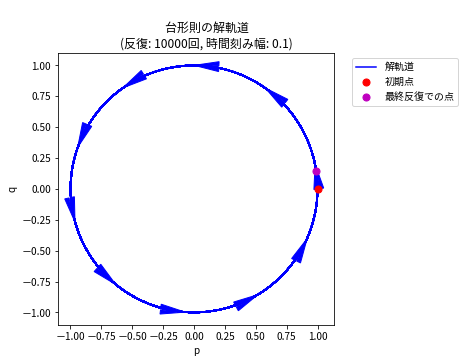

In [14]:
time_stride = 0.1
n_iter = 10000
result = trapezodial(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '台形則')

時間刻み幅0.1の場合．目視では安定しているように見える．

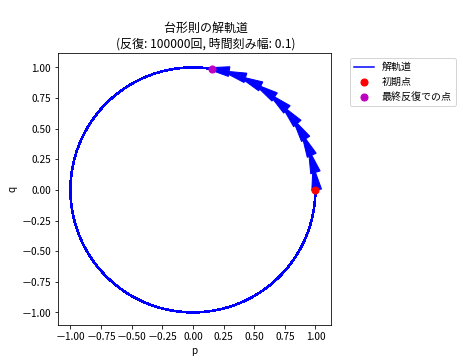

In [15]:
n_iter = 100000
result = trapezodial(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '台形則')

時間刻み幅を変えずに反復回数を増やしても，解軌道は原点を中心とする半径1の円を周回しているように見える．したがって，この場合は(ほぼ)安定しているといえる．

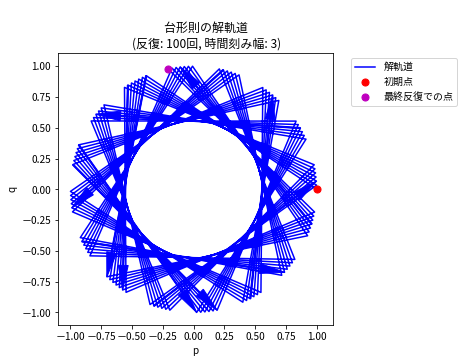

In [16]:
time_stride = 3
n_iter = 100
result = trapezodial(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '台形則')

刻み幅を大きくしてみる．この場合でも安定している．

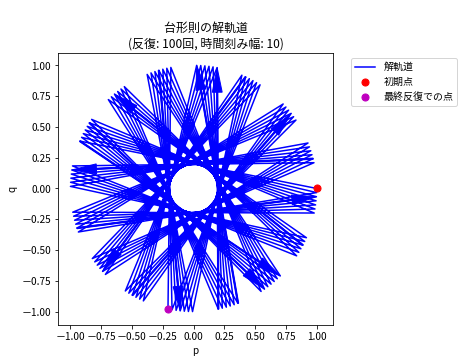

In [17]:
time_stride = 10
n_iter = 100
result = trapezodial(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '台形則')

刻み幅をさらに大きくしてみる．この場合でも安定している．

### 4次Runge-Kutta法
$$
k_1 = J y_n \\
k_2 = J \left  ( y_n + \frac{h}{2} k_ 1\right) \\
k_3 = J \left  ( y_n + \frac{h}{2} k_ 2\right) \\
k_4 = J \left  ( y_n + h k_ 3 \right)
$$
を$k_1$から順に計算していき，
$$
{\boldsymbol {y_{n+1}  = y_n + \frac{h}{6}(k_1 + 2 k_2 + 2 k_3 + k_4)}}
$$

In [18]:
def runge_kutta(init_y, matrix, time_stride, n_iter=100):
    result = np.array([[1], [0]])
    y = init_y.copy()
    for _ in range(n_iter):
        k_1 = np.dot(matrix, y)
        k_2 = np.dot(matrix, y + time_stride * k_1 / 2)
        k_3 = np.dot(matrix, y + time_stride * k_2 / 2)
        k_4 = np.dot(matrix, y + time_stride * k_3)
        y += time_stride * (k_1 + 2* k_2 + 2 * k_3 + k_4) / 6
        result = np.append(result,  y.copy())
    return result.reshape(-1, len(init_y))

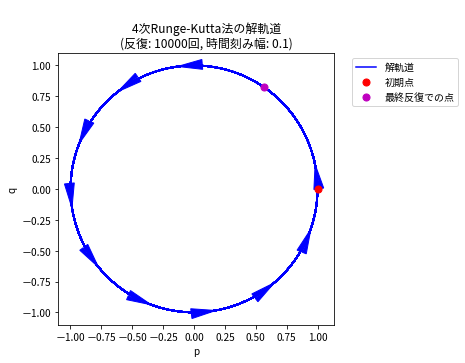

In [19]:
time_stride = 0.1
n_iter = 10000
result = runge_kutta(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '4次Runge-Kutta法')

時間刻み幅0.1の場合．目視では安定しているように見える．

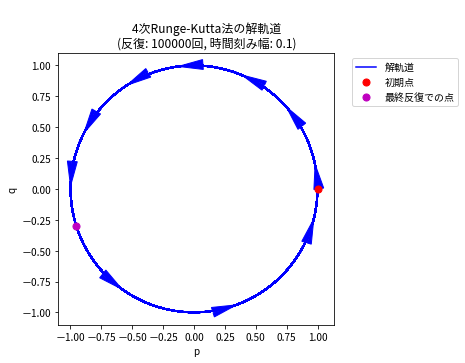

In [20]:
n_iter = 100000
result = runge_kutta(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '4次Runge-Kutta法')

時間刻み幅を変えずに反復回数を増やしても，解軌道は原点を中心とする半径1の円を周回しているように見える．したがって，この場合は(ほぼ)安定しているといえる．

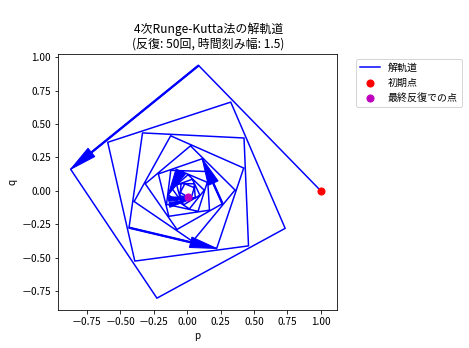

In [21]:
time_stride = 1.5
n_iter = 50
result = runge_kutta(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 5), '4次Runge-Kutta法')

時間刻み幅を大きくしてみる．この場合でも安定している．

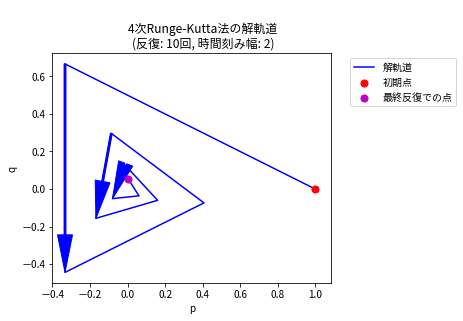

In [22]:
time_stride = 2
n_iter = 10
result = runge_kutta(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 3), '4次Runge-Kutta法')

時間刻み幅をさらに大きくしてみる．この場合でも安定している．

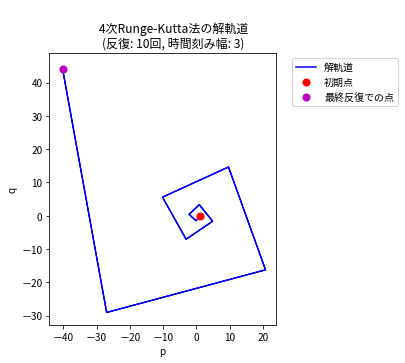

In [23]:
time_stride = 3
n_iter = 10
result = runge_kutta(init_y, matrix, time_stride, n_iter)
plot_track(result, time_stride, n_iter, 1, int(n_iter / 10), '4次Runge-Kutta法')

しかし，時間刻み幅をさらに大きくすると不安定になる．（矢印が小さくて見えないが，「初期点」と「最終反復での点」を見比べると解軌道が発散しているのがわかる．）